In [49]:
import numpy as np
import pandas as pd
df=pd.read_csv('StudentsPerformance_modified.csv')
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72.0,74.0
1,female,group C,some college,standard,completed,69,90.0,88.0
2,female,group B,master's degree,standard,none,90,95.0,93.0
3,male,group A,associate's degree,free/reduced,none,47,57.0,44.0
4,male,group C,some college,standard,none,76,78.0,75.0
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99.0,95.0
996,male,group C,high school,free/reduced,none,62,55.0,55.0
997,female,group C,high school,free/reduced,completed,59,71.0,65.0
998,female,group D,some college,standard,completed,68,78.0,77.0


In [50]:
df['math score'].fillna(0,inplace=True)

In [51]:
df['reading score'].fillna(0,inplace=True)

In [52]:
df['writing score'].fillna(0,inplace=True)

In [53]:
print(df['reading score'].skew(axis=0))
print(df['writing score'].skew(axis=0))

-0.9981405494498179
10.64567554612017


In [54]:
import seaborn as sns

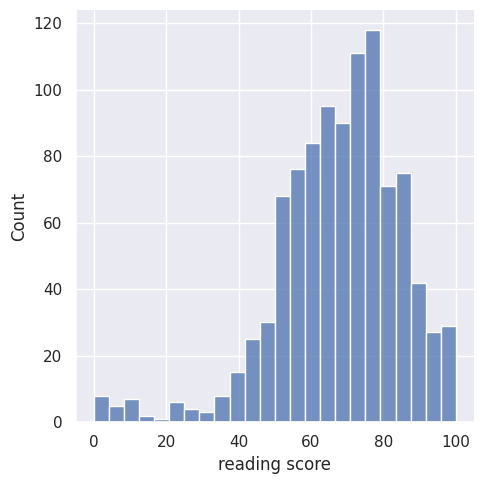

In [55]:
sns.set()
sns.displot(df['reading score'])  

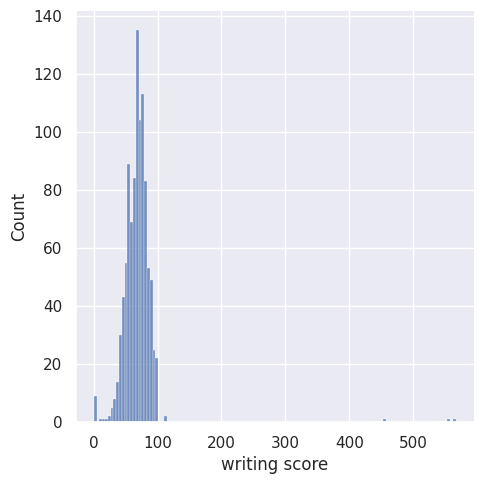

In [56]:
sns.displot(df['writing score'])

In [57]:
Q1 = np.percentile(df['reading score'], 25, method='midpoint')
Q3 = np.percentile(df['reading score'], 75, method='midpoint')
IQR = Q3 - Q1

In [58]:
upper = Q3 + 1.5*IQR
lower = Q1 - 1.5*IQR

In [59]:
df_filtered_IQR = df[(df['reading score'] <= upper) & (df['reading score'] >= lower)]
outliers_IQR = df[(df['reading score'] >= upper) | (df['reading score'] <= lower)]
df_filtered_IQR

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72.0,74.0
1,female,group C,some college,standard,completed,69,90.0,88.0
2,female,group B,master's degree,standard,none,90,95.0,93.0
3,male,group A,associate's degree,free/reduced,none,47,57.0,44.0
4,male,group C,some college,standard,none,76,78.0,75.0
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99.0,95.0
996,male,group C,high school,free/reduced,none,62,55.0,55.0
997,female,group C,high school,free/reduced,completed,59,71.0,65.0
998,female,group D,some college,standard,completed,68,78.0,77.0


In [60]:
outliers_IQR

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
18,male,group C,master's degree,free/reduced,completed,0,22.0,46.0
19,female,group C,associate's degree,free/reduced,none,0,22.0,61.0
20,male,group D,high school,standard,none,0,12.0,63.0
21,female,group B,some college,free/reduced,completed,0,12.0,70.0
22,male,group D,some college,standard,none,0,13.0,53.0
23,female,group C,some high school,standard,none,0,14.0,0.0
24,male,group D,bachelor's degree,free/reduced,completed,74,9.0,80.0
25,male,group A,master's degree,free/reduced,none,73,8.0,72.0
26,male,group B,some college,standard,none,69,7.0,55.0
27,female,group C,bachelor's degree,standard,none,67,6.0,75.0


In [62]:
from scipy import stats
z_scores = stats.zscore(df['reading score'])
z_scores

0      0.253490
1      1.290493
2      1.578549
3     -0.610680
4      0.599157
         ...   
995    1.808995
996   -0.725902
997    0.195878
998    0.599157
999    1.060048
Name: reading score, Length: 1000, dtype: float64

In [63]:
z_threshold = 3
outliers_ZScore = df[abs(z_scores) >= z_threshold]
outliers_ZScore

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
20,male,group D,high school,standard,none,0,12.0,63.0
21,female,group B,some college,free/reduced,completed,0,12.0,70.0
22,male,group D,some college,standard,none,0,13.0,53.0
23,female,group C,some high school,standard,none,0,14.0,0.0
24,male,group D,bachelor's degree,free/reduced,completed,74,9.0,80.0
25,male,group A,master's degree,free/reduced,none,73,8.0,72.0
26,male,group B,some college,standard,none,69,7.0,55.0
27,female,group C,bachelor's degree,standard,none,67,6.0,75.0
28,male,group C,high school,standard,none,70,4.0,0.0
29,female,group D,master's degree,standard,none,62,3.0,75.0


In [64]:
df_filtered_ZScore = df[abs(z_scores) < z_threshold]
df_filtered_ZScore

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72.0,74.0
1,female,group C,some college,standard,completed,69,90.0,88.0
2,female,group B,master's degree,standard,none,90,95.0,93.0
3,male,group A,associate's degree,free/reduced,none,47,57.0,44.0
4,male,group C,some college,standard,none,76,78.0,75.0
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99.0,95.0
996,male,group C,high school,free/reduced,none,62,55.0,55.0
997,female,group C,high school,free/reduced,completed,59,71.0,65.0
998,female,group D,some college,standard,completed,68,78.0,77.0


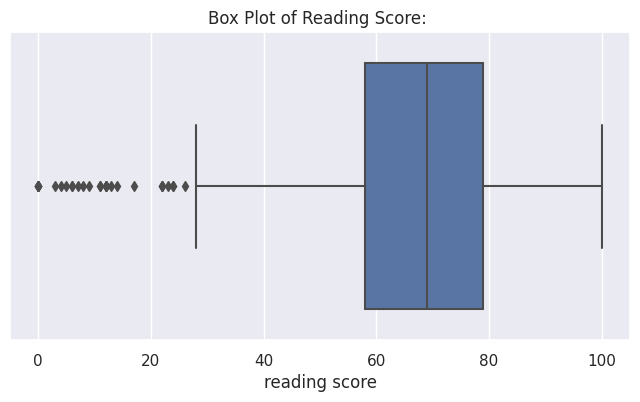

In [68]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['reading score'])
plt.title("Box Plot of Reading Score: ")
plt.show()

In [70]:
from sklearn.preprocessing import MinMaxScaler as MinMaxScaler
scaler = MinMaxScaler()
df_scaled = df
df_scaled['reading score'] = scaler.fit_transform(df_scaled['reading score'].values.reshape(-1, 1))
df_scaled['writing score'] = scaler.fit_transform(df_scaled['writing score'].values.reshape(-1, 1))
df_scaled

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,0.72,0.130511
1,female,group C,some college,standard,completed,69,0.90,0.155203
2,female,group B,master's degree,standard,none,90,0.95,0.164021
3,male,group A,associate's degree,free/reduced,none,47,0.57,0.077601
4,male,group C,some college,standard,none,76,0.78,0.132275
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,0.99,0.167549
996,male,group C,high school,free/reduced,none,62,0.55,0.097002
997,female,group C,high school,free/reduced,completed,59,0.71,0.114638
998,female,group D,some college,standard,completed,68,0.78,0.135802


In [71]:
from sklearn.preprocessing import StandardScaler as StandardScaler
scaler = StandardScaler()
df_scaled = df
df_scaled['reading score'] = scaler.fit_transform(df_scaled['reading score'].values.reshape(-1, 1))
df_scaled['writing score'] = scaler.fit_transform(df_scaled['writing score'].values.reshape(-1, 1))
df_scaled

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,0.253490,0.170479
1,female,group C,some college,standard,completed,69,1.290493,0.634998
2,female,group B,master's degree,standard,none,90,1.578549,0.800897
3,male,group A,associate's degree,free/reduced,none,47,-0.610680,-0.824920
4,male,group C,some college,standard,none,76,0.599157,0.203658
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,1.808995,0.867257
996,male,group C,high school,free/reduced,none,62,-0.725902,-0.459940
997,female,group C,high school,free/reduced,completed,59,0.195878,-0.128141
998,female,group D,some college,standard,completed,68,0.599157,0.270018
